# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here

import numpy as np
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [16]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [17]:
print (temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [12]:
# your answer here
df_ny = temp.loc[temp['State'] == "New York"]
df_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [14]:
# your answer here
df_ny[['Temperature']].mean(axis=0)

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [21]:
# your answer here
temp[temp.Temperature > 15][["City","State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
# your answer here
temp[temp.Temperature > 15][["City"]]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [26]:
# your answer here
filtered = temp[(temp['Temperature']>15) & 
                (temp['Temperature']< 20)][["City"]]


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [33]:
# your answer here
temp_mean = temp["Temperature"].agg(["mean", "std"])
temp_mean



mean    15.158730
std      6.695265
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [35]:
# your answer here
employee  = pd.read_csv('employee.csv')
print (employee)

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### Explore the data types of the Temp dataframe. Comment your results

In [36]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset (Years and Salary, 20 buckets). In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

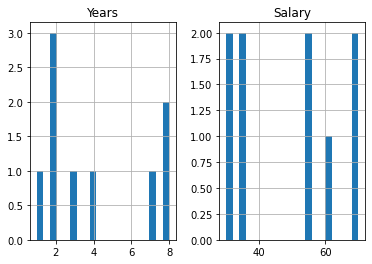

In [51]:
# your answer here
employee[["Years","Salary"]].hist(bins=20)

#### What's the average salary in this company?

In [44]:
# your answer here
salary_mean = employee["Salary"].agg("mean")
salary_mean

48.888888888888886

#### What's the highest salary?

In [46]:
# your answer here
salary_max = employee["Salary"].agg("max")
salary_max

70

#### What's the lowest salary?

In [47]:
# your answer here
salary_min = employee["Salary"].agg("min")
salary_min

30

#### Who are the employees with the lowest salary?

In [55]:
# your answer here
employee_min = employee["Name"].agg({'Salary':'min'})
employee_min

Salary    Ana
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [56]:
# your answer here
David = employee[(employee['Name']=='David')]
David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [58]:
# your answer here
David_salary= employee["Salary"][(employee['Name']=='David')]
David_salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [59]:
# your answer here
Associates = employee[(employee['Title']=='associate')]
Associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [60]:
# your answer here- 1 method
df_three = employee.loc[0:2]
df_three

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [61]:
# your answer here- 2nd method
df_three_2 = employee.iloc[0:3]
df_three_2

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [63]:
# your answer here
filtered2 = employee[(employee['Title']=='associate') & 
                (employee['Salary']>55)]
filtered2

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [64]:
# your answer here
grouped=employee.groupby(['Years']).agg({'Salary':'mean'})
grouped

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [65]:
# your answer here
grouped_2=employee.groupby(['Title']).agg({'Salary':'mean'})
grouped_2

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [26]:
# draw boxplot here

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [66]:
# your answer here
grouped_3=employee.groupby(['Gender']).agg({'Salary':'mean'})
grouped_3

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [70]:
# your answer here
grouped_4=employee.groupby(['Department'])[["Years","Salary"]].agg(['mean',"max","min"])
grouped_4
# list can not be keys in dicts

Years         Salary        
                mean max min   mean max min
Department                                 
HR          4.666667   8   2  45.00  70  30
IT          4.500000   8   1  48.75  70  30
Sales       2.500000   3   2  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [75]:
# your answer here
grouped_4["Salary"].agg("max(axis=1)") - grouped_4["Salary"].agg("min(axis=1)")


AttributeError: 'max(axis=1)' is not a valid function for 'DataFrame' object

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [77]:
# your answer here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [78]:
# your answer here
orders.describe

<bound method NDFrame.describe of         Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0                0     536365    85123A  2010     12    3     8   
1                1     536365     71053  2010     12    3     8   
2                2     536365    84406B  2010     12    3     8   
3                3     536365    84029G  2010     12    3     8   
4                4     536365    84029E  2010     12    3     8   
...            ...        ...       ...   ...    ...  ...   ...   
397919      541904     581587     22613  2011     12    5    12   
397920      541905     581587     22899  2011     12    5    12   
397921      541906     581587     23254  2011     12    5    12   
397922      541907     581587     23255  2011     12    5    12   
397923      541908     581587     22138  2011     12    5    12   

                                Description  Quantity          InvoiceDate  \
0        white hanging heart t-light holder         6  2010-12-01 08:26:00   
1    

In [79]:
# your answer here
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


####  What is the average Purchase Price?

In [80]:
# your answer here
avg_amount_spent = orders.agg({'amount_spent':'mean'})
avg_amount_spent

amount_spent    22.394749
dtype: float64

#### What were the highest and lowest purchase prices? 

In [81]:
# your answer here
max_amount_spent = orders.agg({'amount_spent':'max'})
max_amount_spent

amount_spent    168469.6
dtype: float64

In [82]:
# your answer here
min_amount_spent = orders.agg({'amount_spent':'min'})
min_amount_spent

amount_spent    0.0
dtype: float64

#### Select all the customers we have in Spain

In [84]:
# your answer here
spain = orders[(orders['Country']=='Spain')]
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [87]:
# your answer here
count_spain = spain["Country"].count()
count_spain

2485

#### Select all the customers who have bought more than 50 items ?

In [92]:
# your answer here
orders_50 = orders["CustomerID"][(orders['Quantity']> 50)]
orders_50

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64

#### Select orders from Spain that are above 50 items

In [91]:
# your answer here
spain_50 = spain["CustomerID"][(spain['Quantity']> 50)]
spain_50

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
32454     12557
32455     12557
32456     12557
32457     12557
91155     12557
91156     12557
91159     12557
174442    12557
174443    12557
174444    12557
174445    12557
174446    12557
174447    12557
174448    12557
174449    12557
197167    12507
197168    12507
197169    12507
197170    12507
197171    12507
224881    12484
254097    12546
289129    12454
289134    12454
289142    12454
289143    12454
295956    12596
312655    12597
312656    12597
312657    12597
366326    12557
366327    12557
366328    12557
366329    12557
Name: CustomerID, dtype: int64

#### Select all free orders

In [99]:
# your answer here
orders_free = [(orders['amount_spent']=0)]
orders_free

SyntaxError: invalid syntax (<ipython-input-99-40ee8e940914>, line 2)

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here